In [1]:
import pandas as pd
# Reading the files
plant_1_df = pd.read_csv('Plant_1_Generation_Data.csv')
plant_2_df = pd.read_csv('Plant_2_Generation_Data.csv')
solar_recording_df = pd.read_csv('SolarRecording.csv')

# Displaying the first few rows of each file to understand their structure and contents
#plant_1_df.head() 
#plant_2_df.head()
#solar_recording_df.head()

In [2]:
from datetime import datetime

# Preprocessing the plant generation data by formatting the 'DATE_TIME' column
plant_1_df['DATE_TIME'] = pd.to_datetime(plant_1_df['DATE_TIME'], dayfirst=True)
plant_2_df['DATE_TIME'] = pd.to_datetime(plant_2_df['DATE_TIME'], dayfirst=True)
solar_recording_df['DATE_TIME'] = pd.to_datetime(solar_recording_df['Date'] + ' ' + solar_recording_df['Time'])

C:\Users\user\AppData\Local\Temp\ipykernel_11996\4273201748.py:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  plant_2_df['DATE_TIME'] = pd.to_datetime(plant_2_df['DATE_TIME'], dayfirst=True)


In [3]:
# Combining the plant datasets
combined_plant_df = pd.concat([plant_1_df, plant_2_df])

# Averaging the power output and other metrics over each timestamp
avg_power_output = combined_plant_df.groupby('DATE_TIME').agg({'DC_POWER': 'mean', 'AC_POWER': 'mean',
                                                               'DAILY_YIELD': 'mean', 'TOTAL_YIELD': 'mean'}).reset_index()

avg_power_output

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,0.0,0.0,1137.207863,3.333297e+08
1,2020-05-15 00:15:00,0.0,0.0,660.488372,3.333297e+08
2,2020-05-15 00:30:00,0.0,0.0,660.488372,3.333297e+08
3,2020-05-15 00:45:00,0.0,0.0,660.488372,3.333297e+08
4,2020-05-15 01:00:00,0.0,0.0,602.636364,3.259172e+08
...,...,...,...,...,...
3258,2020-06-17 22:45:00,0.0,0.0,5059.340909,3.261414e+08
3259,2020-06-17 23:00:00,0.0,0.0,5059.340909,3.261414e+08
3260,2020-06-17 23:15:00,0.0,0.0,5059.340909,3.261414e+08
3261,2020-06-17 23:30:00,0.0,0.0,5059.340909,3.261414e+08


In [4]:
# Checking the date ranges for each dataset
plant_date_range = (combined_plant_df['DATE_TIME'].min(), combined_plant_df['DATE_TIME'].max())
solar_recording_date_range = (solar_recording_df['DATE_TIME'].min(), solar_recording_df['DATE_TIME'].max())

solar_recording_date_range

(Timestamp('2020-05-15 00:00:08'), Timestamp('2020-09-13 23:55:01'))

In [5]:
# Rounding the timestamps to the nearest minute for both datasets
combined_plant_df['DATE_TIME'] = combined_plant_df['DATE_TIME'].dt.round('min')
solar_recording_df['DATE_TIME'] = solar_recording_df['DATE_TIME'].dt.round('min')

# Re-averaging the power output and other metrics over each timestamp after rounding
avg_power_output_rounded = combined_plant_df.groupby('DATE_TIME').agg({'DC_POWER': 'mean', 'AC_POWER': 'mean',
                                                                       'DAILY_YIELD': 'mean', 'TOTAL_YIELD': 'mean'}).reset_index()

# Merging the datasets again
merged_df_rounded = pd.merge(avg_power_output_rounded, solar_recording_df, on='DATE_TIME', how='inner')

# Checking the merged dataframe after rounding timestamps
merged_df_rounded.head()

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,Unnamed: 0,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,2020-05-15 00:00:00,0.0,0.0,1137.207863,3.333297e+08,7416,1472724008,5/15/2020,0:00:08,2.58,51,30.43,103,77.27,11.25,6:07:00,18:38:00
1,2020-05-15 00:30:00,0.0,0.0,660.488372,3.333297e+08,7412,1472725809,5/15/2020,0:30:09,2.25,51,30.43,103,67.42,11.25,6:07:00,18:38:00
2,2020-05-15 00:45:00,0.0,0.0,660.488372,3.333297e+08,7411,1472726704,5/15/2020,0:45:04,2.15,51,30.43,103,67.85,4.50,6:07:00,18:38:00
3,2020-05-15 01:00:00,0.0,0.0,602.636364,3.259172e+08,7408,1472727607,5/15/2020,1:00:07,2.10,52,30.43,103,92.15,4.50,6:07:00,18:38:00
4,2020-05-15 01:15:00,0.0,0.0,441.302326,3.333297e+08,7405,1472728514,5/15/2020,1:15:14,2.40,51,30.42,103,39.69,3.37,6:07:00,18:38:00


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant columns for correlation analysis
correlation_columns = ['DC_POWER', 'AC_POWER', 'Radiation', 'Temperature', 'Pressure', 
                       'Humidity', 'WindDirection(Degrees)', 'Speed']

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

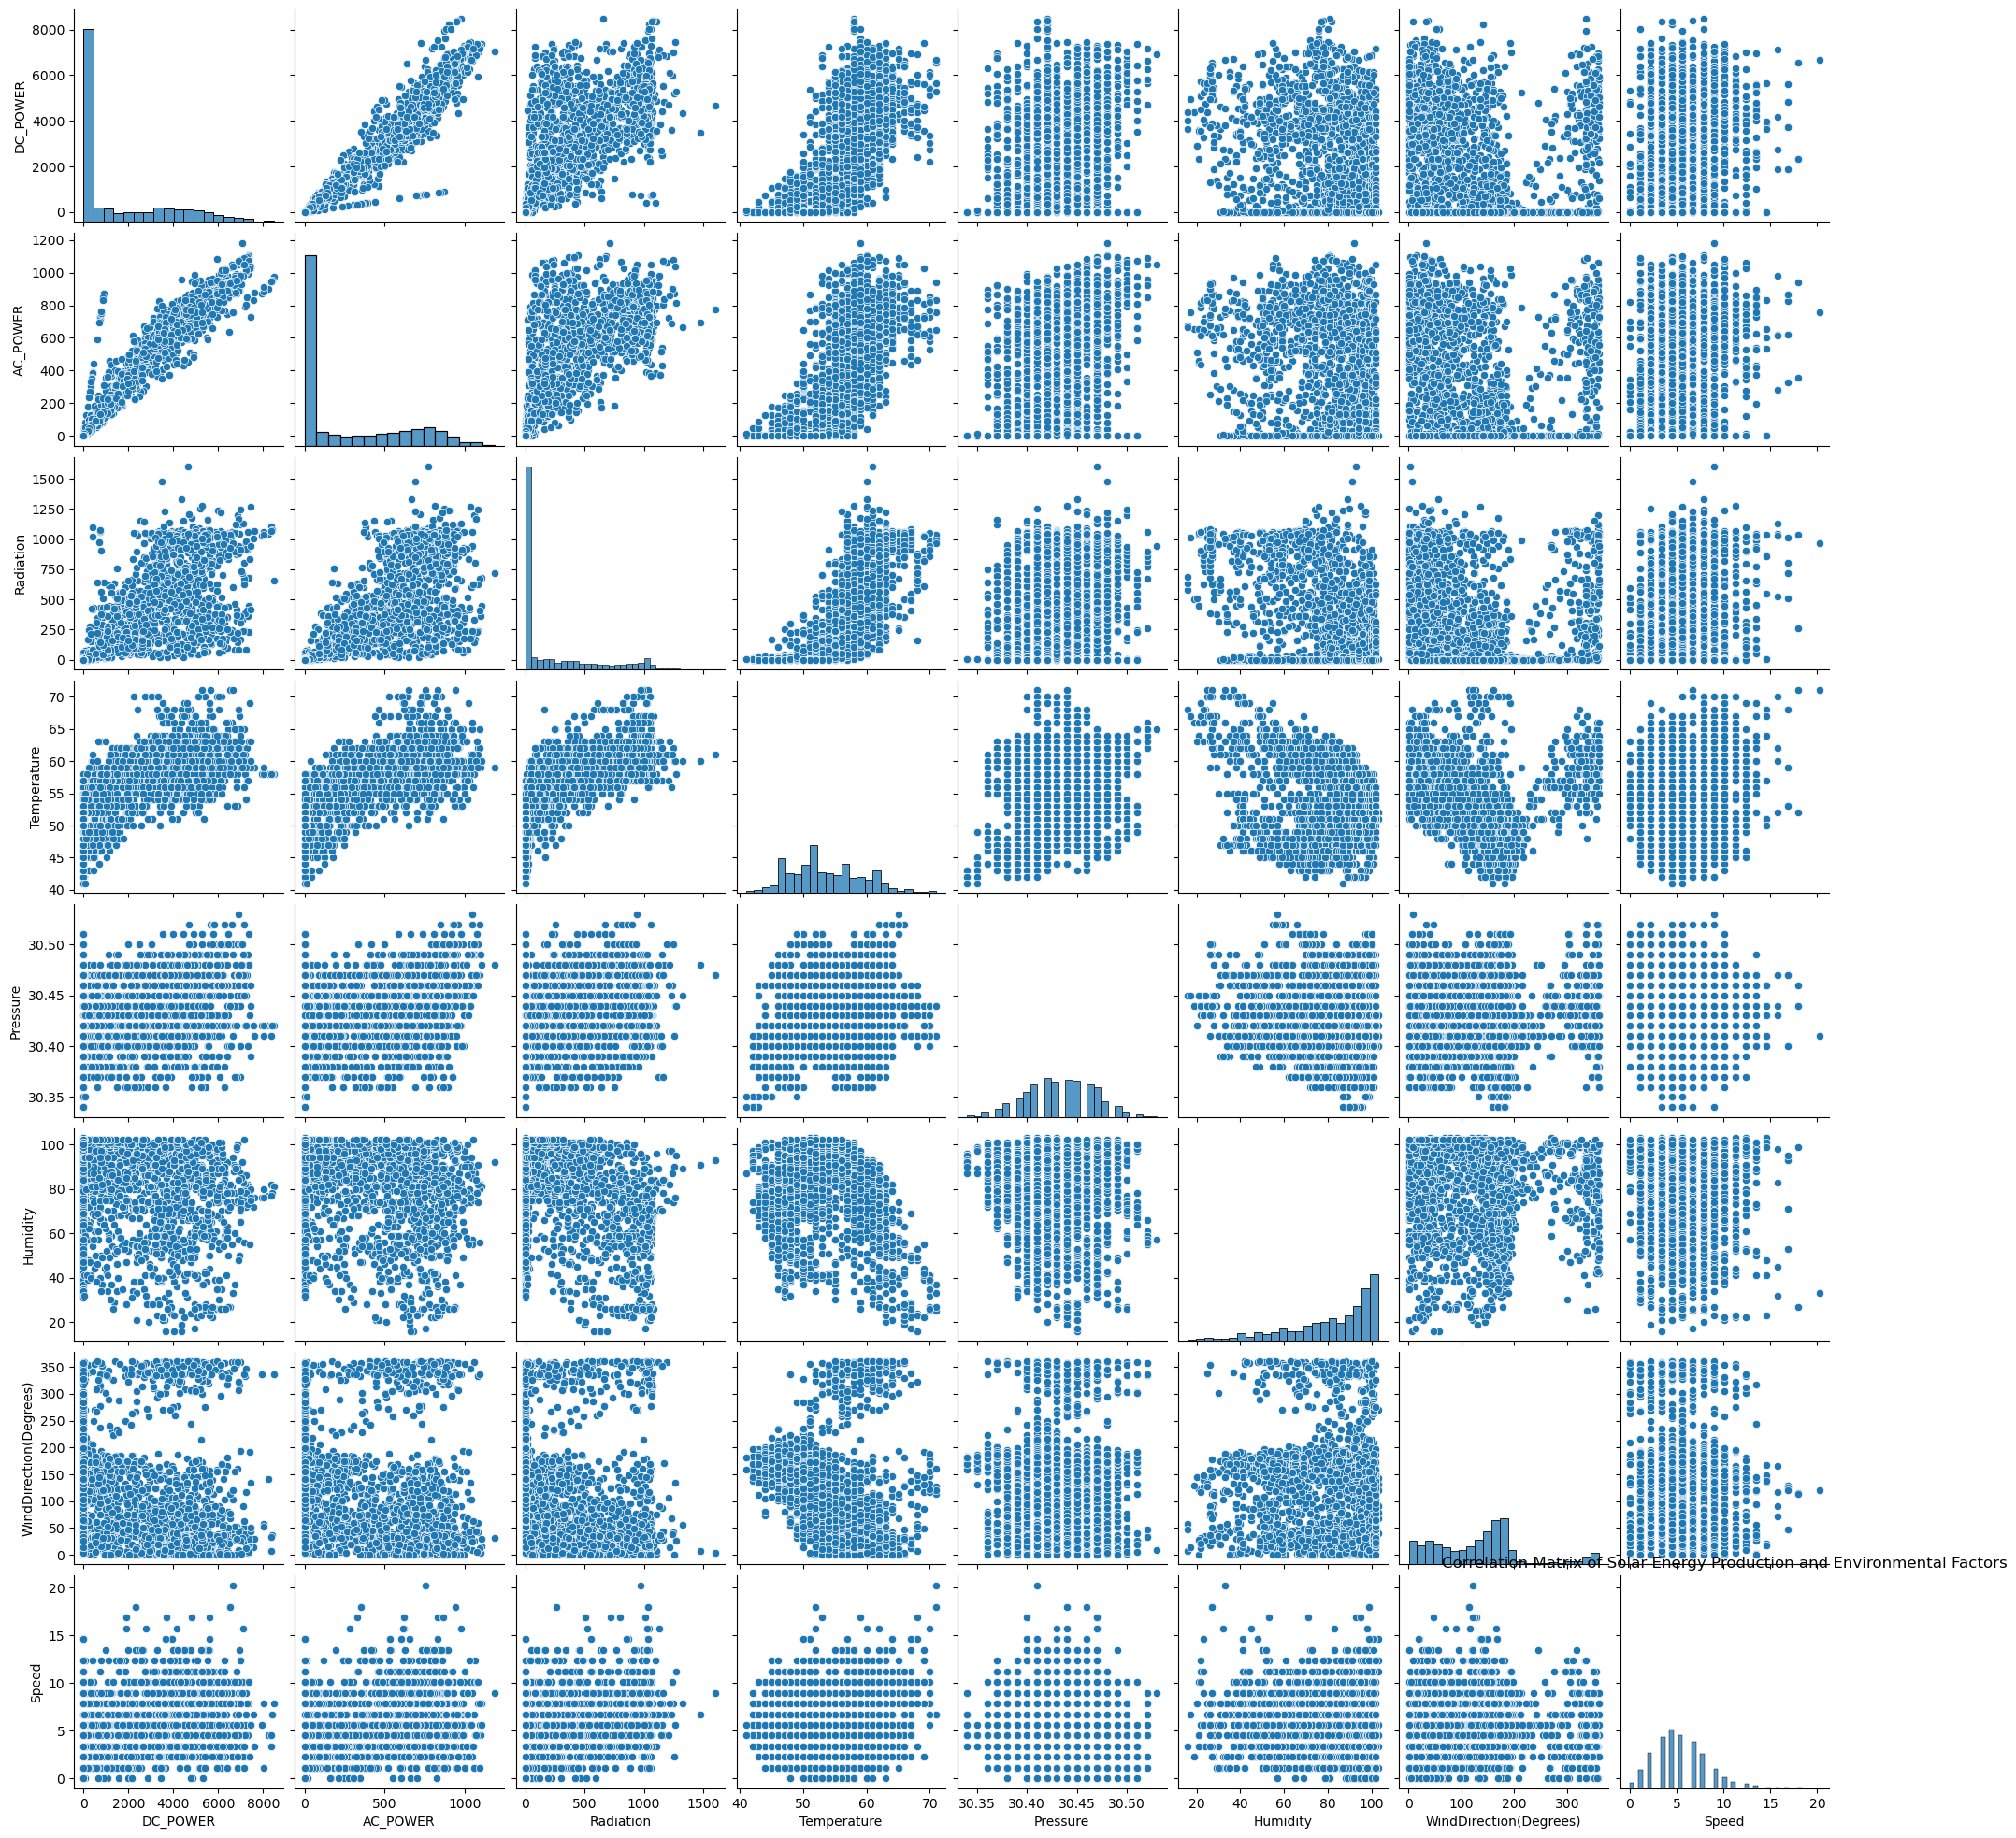

In [7]:
plt.figure(figsize=(10, 8))
sns.pairplot(data=merged_df_rounded[correlation_columns])
plt.title('Correlation Matrix of Solar Energy Production and Environmental Factors')
plt.show()

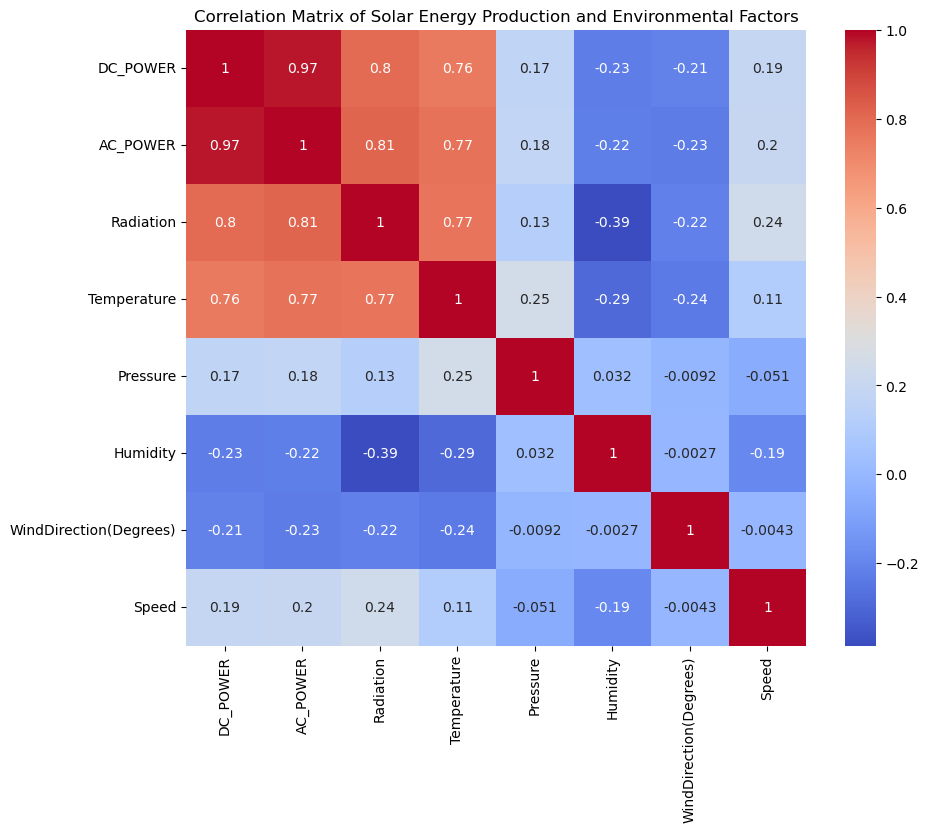

In [9]:
# Computing the correlation matrix
correlation_matrix = merged_df_rounded[correlation_columns].corr()
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Solar Energy Production and Environmental Factors')
plt.show()

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

X = merged_df_rounded[['Radiation']]
y = merged_df_rounded['DC_POWER']  # Using DC Power as the target variable

# Function to train and evaluate models for a given feature
def train_and_evaluate_models(feature_name):
    # Data Preparation for the feature
    X_feature = merged_df_rounded[[feature_name]]

    # Splitting the dataset
    X_train_feature, X_test_feature, y_train_feature, y_test_feature = train_test_split(X_feature, y, test_size=0.2, random_state=42)

    # Dictionary to store models and their predictions
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest Regressor": RandomForestRegressor(random_state=42),
        "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
        "Support Vector Regressor": SVR()
    }
    predictions = {}
    evaluations = {}

    # Training and Evaluating models
    for model_name, model in models.items():
        model.fit(X_train_feature, y_train_feature)
        y_pred = model.predict(X_test_feature)
        mse = mean_squared_error(y_test_feature, y_pred)
        r2 = r2_score(y_test_feature, y_pred)
        evaluations[model_name] = (mse, r2)
        predictions[model_name] = y_pred

    return evaluations, predictions, X_test_feature, y_test_feature
# Function to visualize the predictions of models
def visualize_predictions(feature_name, predictions, X_test_feature, y_test_feature):
    plt.figure(figsize=(15, 10))
    plt.scatter(X_test_feature, y_test_feature, color='black', label='Actual')

    for model_name, y_pred in predictions.items():
        plt.scatter(X_test_feature, y_pred, label=model_name)

    plt.title(f'Model Predictions vs Actual for {feature_name}')
    plt.xlabel(feature_name)
    plt.ylabel('Solar Power Production')
    plt.legend()
    plt.show()


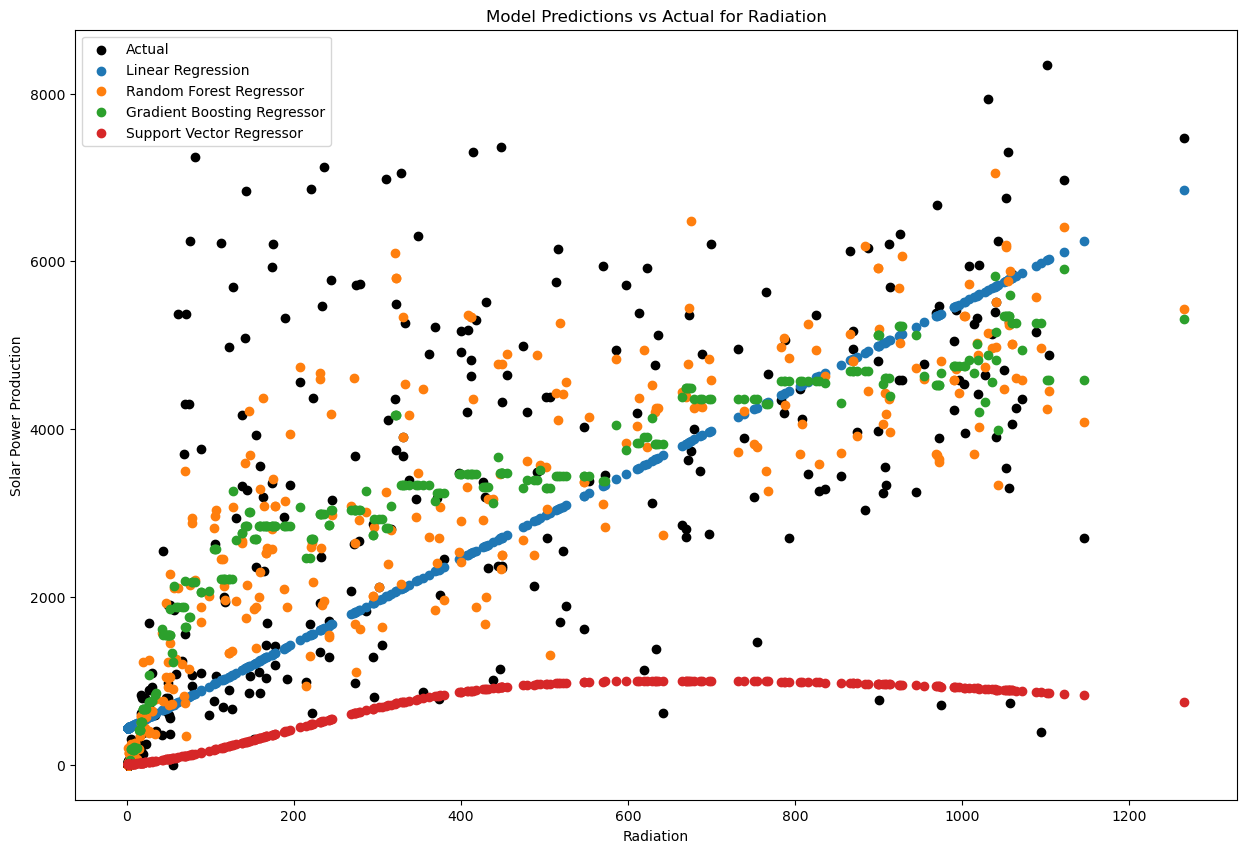

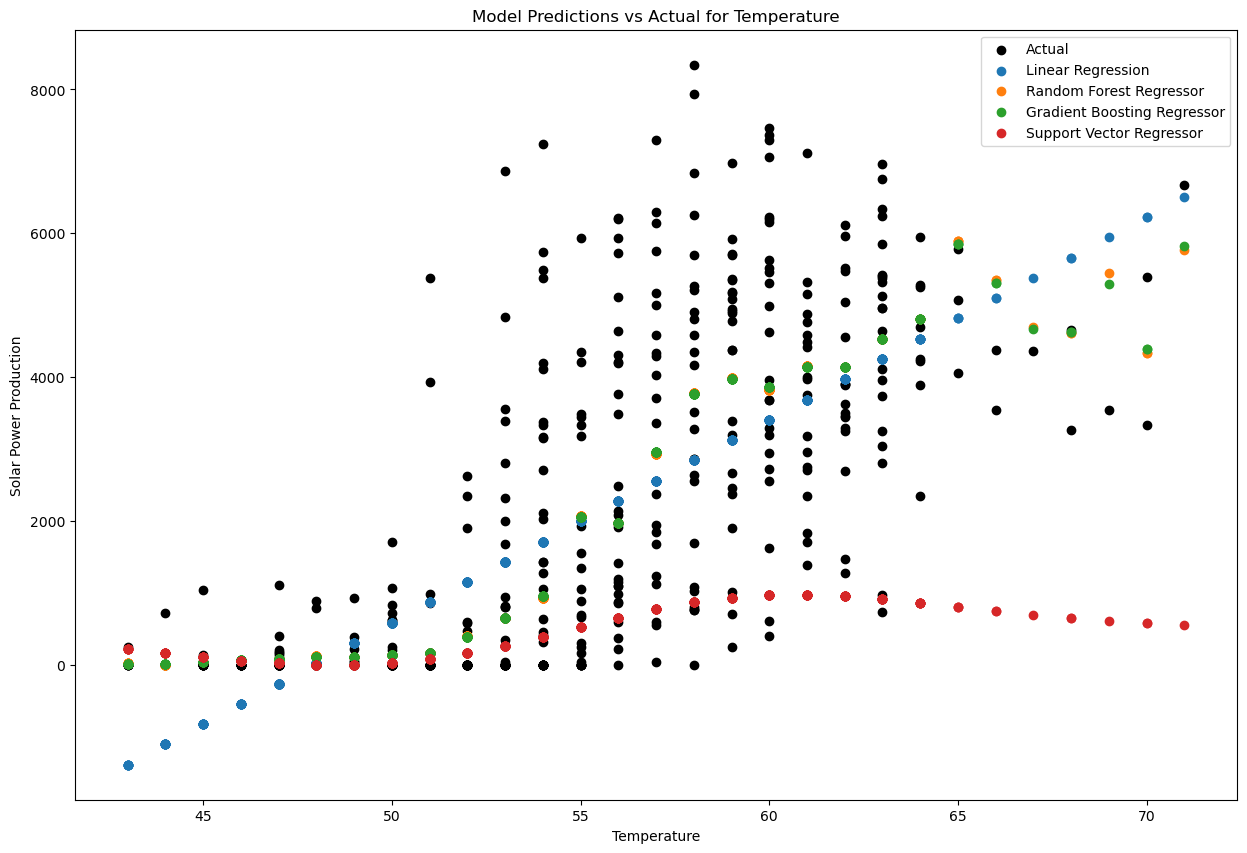

In [13]:
# Training and evaluating models for 'Radiation' only
evaluations_radiation, predictions_radiation, X_test_radiation, y_test_radiation = train_and_evaluate_models('Radiation')

# Visualizing the model predictions for 'Radiation'
visualize_predictions('Radiation', predictions_radiation, X_test_radiation, y_test_radiation)

# Training and evaluating models for 'Temperature' only
evaluations_temperature, predictions_temperature, X_test_temperature, y_test_temperature = train_and_evaluate_models('Temperature')

# Visualizing the model predictions for 'Temperature'
visualize_predictions('Temperature', predictions_temperature, X_test_temperature, y_test_temperature)


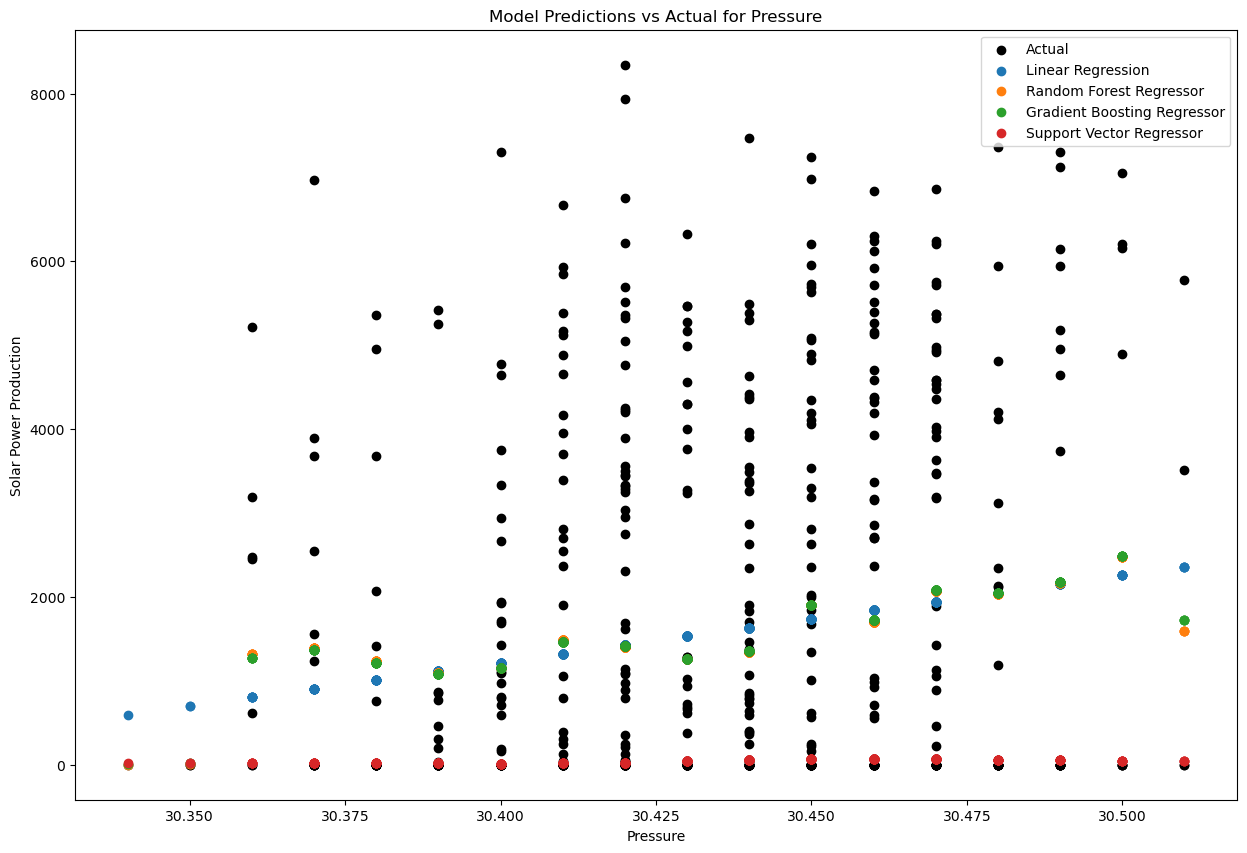

In [14]:
# Training and evaluating models for 'Pressure'
evaluations_pressure, predictions_pressure, X_test_pressure, y_test_pressure = train_and_evaluate_models('Pressure')
evaluations_pressure

import matplotlib.pyplot as plt

# Visualizing the model predictions for 'Pressure'
visualize_predictions('Pressure', predictions_pressure, X_test_pressure, y_test_pressure)


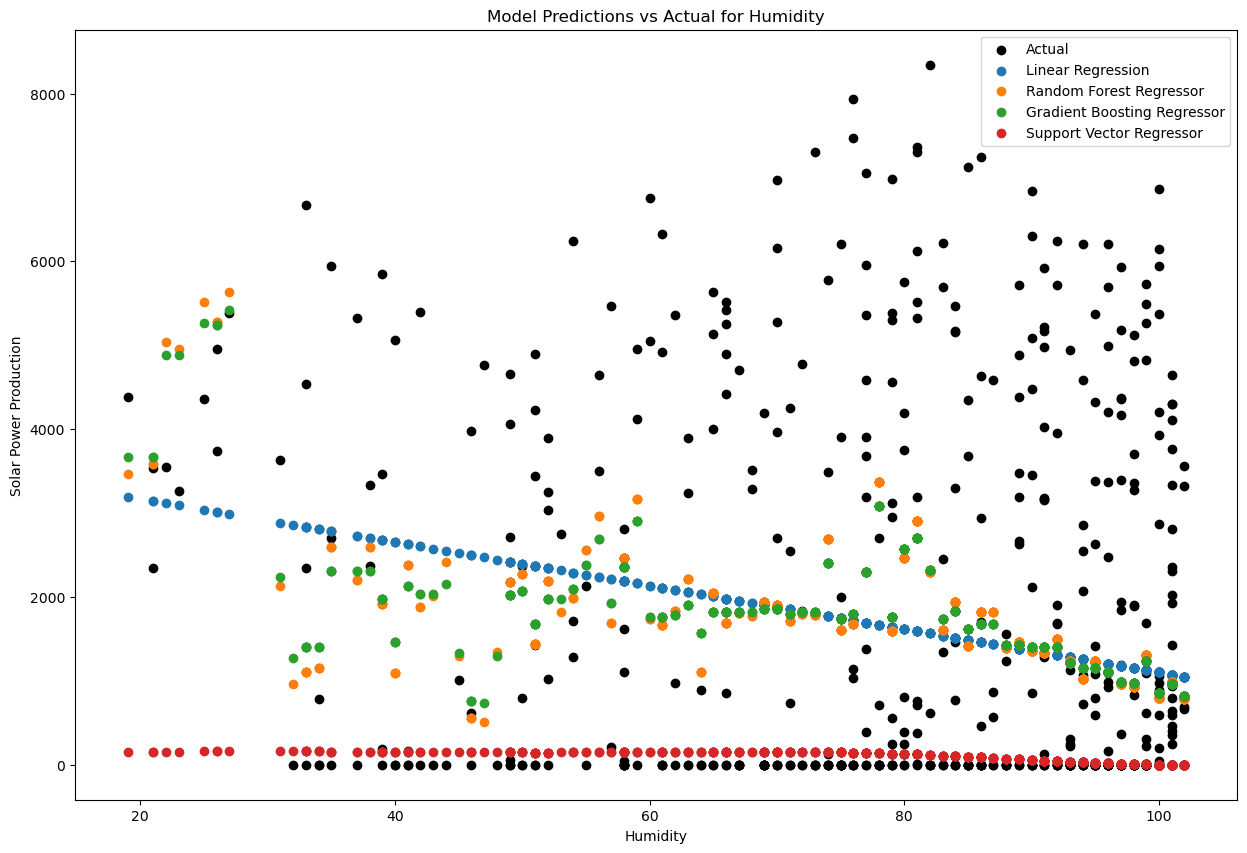

In [15]:
# Training and evaluating models for 'Humidity'
evaluations_humidity, predictions_humidity, X_test_humidity, y_test_humidity = train_and_evaluate_models('Humidity')
evaluations_humidity

# Visualizing the model predictions for 'Humidity'
visualize_predictions('Humidity', predictions_humidity, X_test_humidity, y_test_humidity)

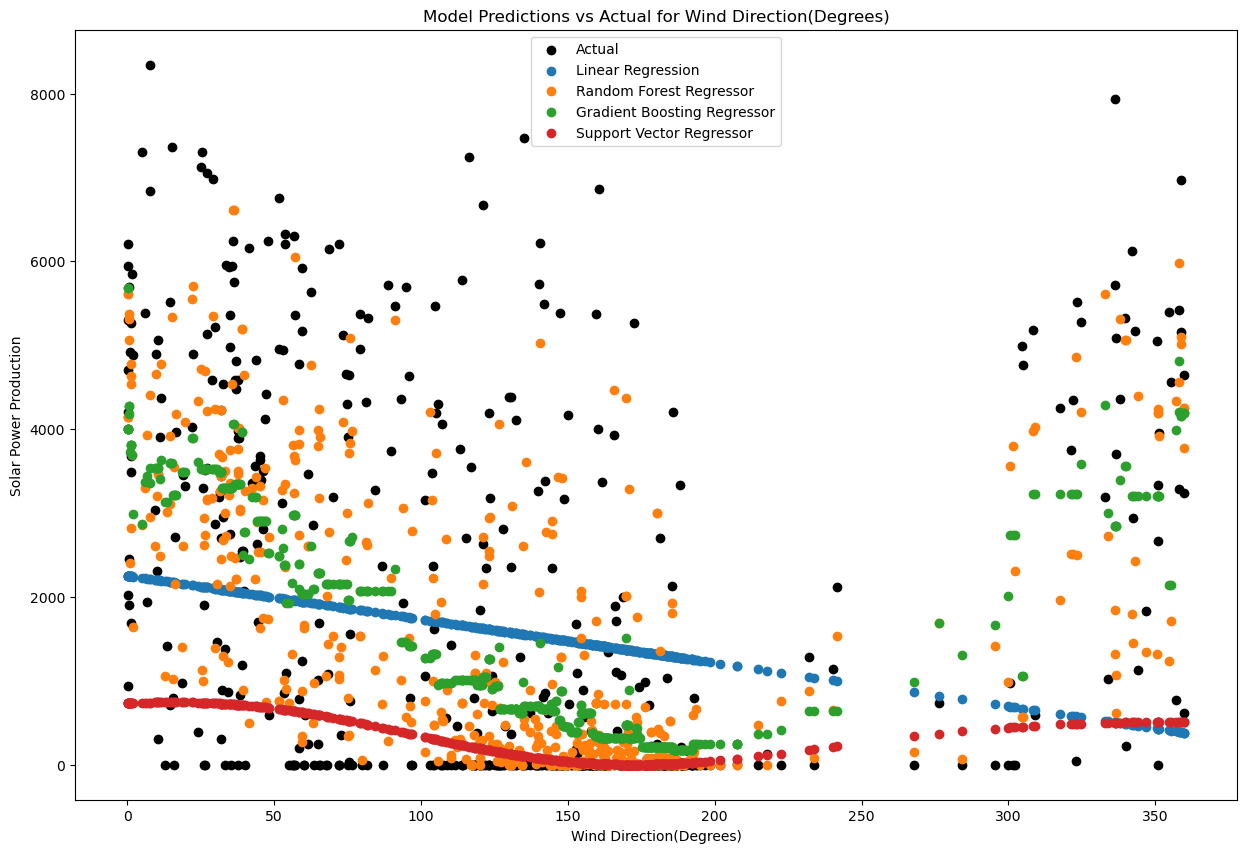

In [16]:
# Training and evaluating models for 'Wind Direction(Degrees)'
evaluations_wind_dir, predictions_wind_dir, X_test_wind_dir, y_test_wind_dir = train_and_evaluate_models('WindDirection(Degrees)')
evaluations_wind_dir

# Visualizing the model predictions for 'Wind Direction(Degrees)'
visualize_predictions('Wind Direction(Degrees)', predictions_wind_dir, X_test_wind_dir, y_test_wind_dir)


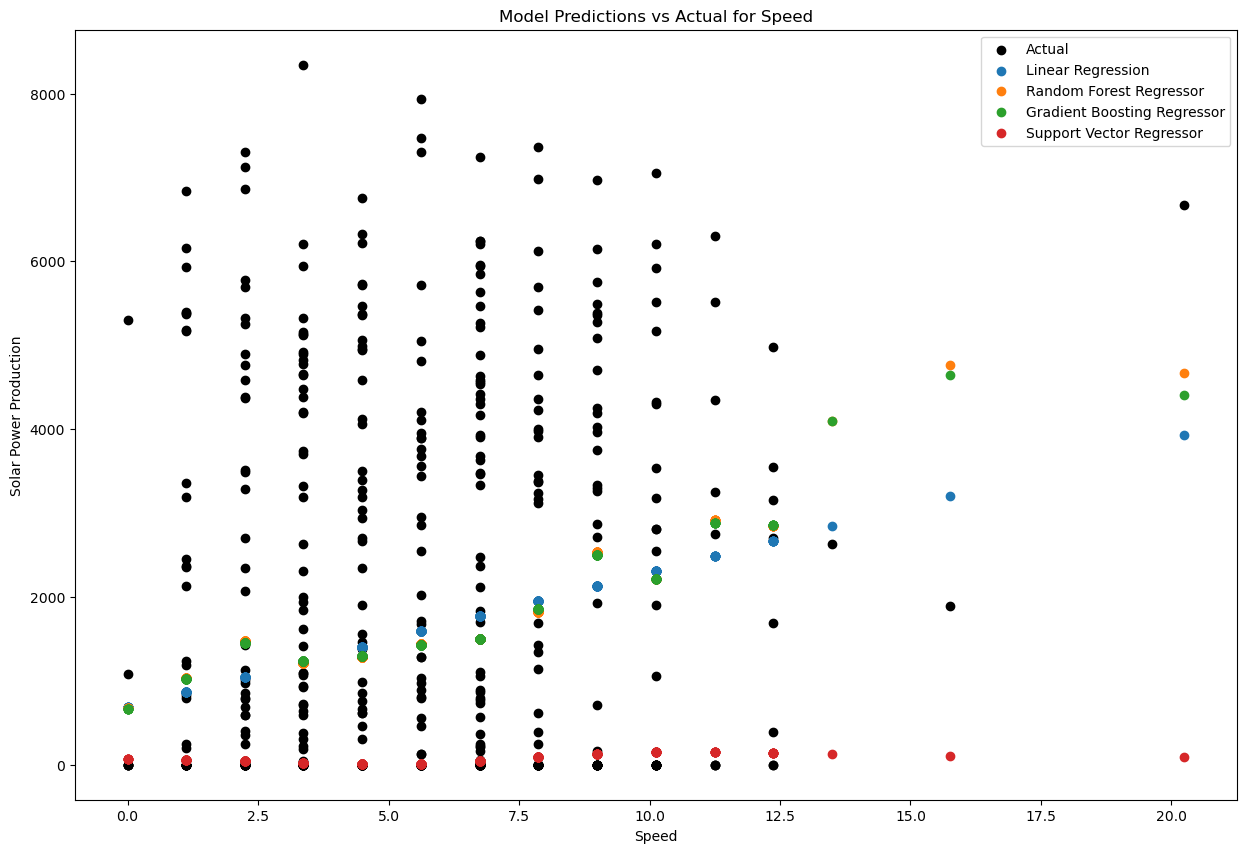

In [17]:
# Training and evaluating models for 'Speed'
evaluations_speed, predictions_speed, X_test_speed, y_test_speed = train_and_evaluate_models('Speed')
evaluations_speed

# Visualizing the model predictions for 'Speed'
visualize_predictions('Speed', predictions_speed, X_test_speed, y_test_speed)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


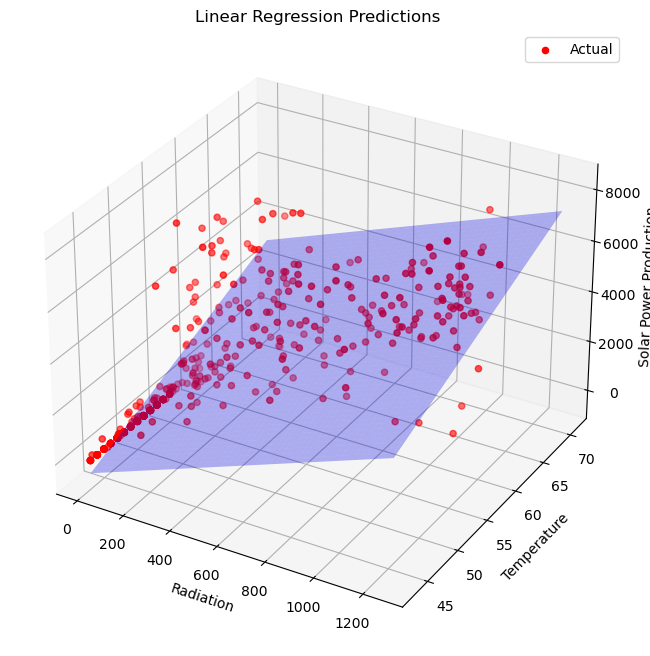

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


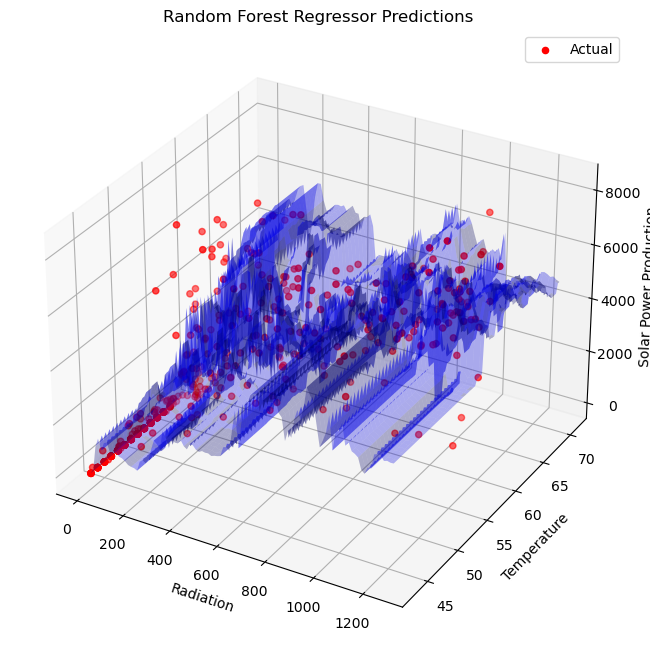

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


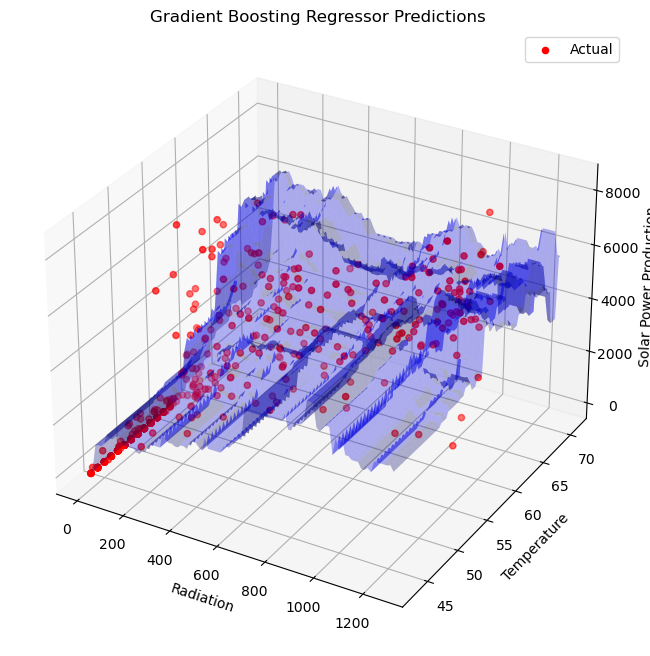

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


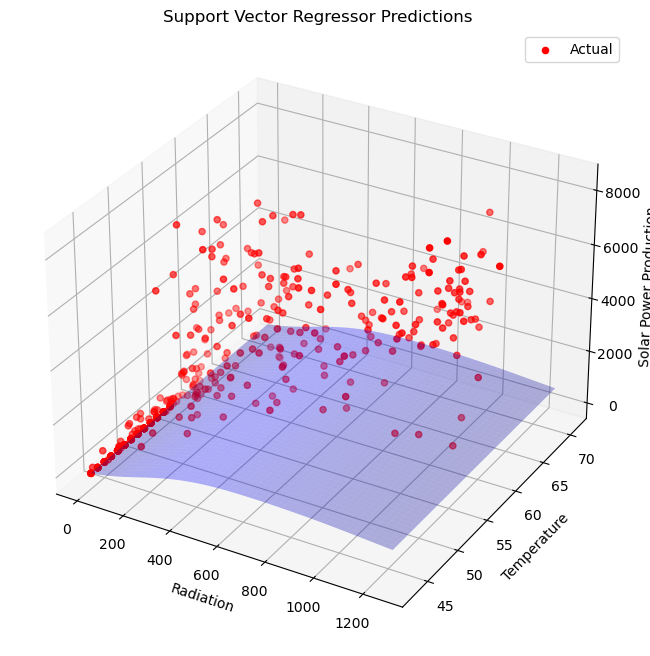

In [19]:
def visualize_predictions_3d(feature_names, model_name, model, X_train, y_train, X_test, y_test):
    """
    Visualize the predictions of a model in 3D space.
    """
    # Training the model
    model.fit(X_train, y_train)

    # Creating a mesh grid for 3D plot
    x = np.linspace(X_test[feature_names[0]].min(), X_test[feature_names[0]].max(), 100)
    y = np.linspace(X_test[feature_names[1]].min(), X_test[feature_names[1]].max(), 100)
    x, y = np.meshgrid(x, y)
    z = model.predict(np.array([x.ravel(), y.ravel()]).T).reshape(x.shape)

    # Plotting
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_test[feature_names[0]], X_test[feature_names[1]], y_test, color='red', label='Actual')
    ax.plot_surface(x, y, z, color='blue', alpha=0.3)
    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])
    ax.set_zlabel('Solar Power Production')
    ax.set_title(f'{model_name} Predictions')
    ax.legend()
    plt.show()

# Visualizing predictions for each model
for model_name, model in models_rad_temp.items():
    visualize_predictions_3d(['Radiation', 'Temperature'], model_name, model, X_train_rad_temp, y_train_rad_temp, X_test_rad_temp, y_test_rad_temp)

In [20]:
# Compiling accuracy data for all environmental factors
accuracy_data = {
    "Radiation": evaluations_radiation,
    "Temperature": evaluations_temperature,
    "Pressure": evaluations_pressure,
    "Humidity": evaluations_humidity,
    "Wind Direction": evaluations_wind_dir,
    "Speed": evaluations_speed
}

# Displaying the accuracy data in a formatted way
formatted_accuracy_data = {factor: {model: {'MSE': round(mse, 2), 'R-squared': round(r2, 2)} 
                                    for model, (mse, r2) in evaluations.items()} 
                           for factor, evaluations in accuracy_data.items()}

formatted_accuracy_data


{'Radiation': {'Linear Regression': {'MSE': 2027948.42, 'R-squared': 0.58},
  'Random Forest Regressor': {'MSE': 1739686.54, 'R-squared': 0.64},
  'Gradient Boosting Regressor': {'MSE': 1364470.9, 'R-squared': 0.72},
  'Support Vector Regressor': {'MSE': 5372607.09, 'R-squared': -0.11}},
 'Temperature': {'Linear Regression': {'MSE': 2255110.79, 'R-squared': 0.53},
  'Random Forest Regressor': {'MSE': 1965490.64, 'R-squared': 0.59},
  'Gradient Boosting Regressor': {'MSE': 1958011.37, 'R-squared': 0.6},
  'Support Vector Regressor': {'MSE': 5301755.09, 'R-squared': -0.1}},
 'Pressure': {'Linear Regression': {'MSE': 4692814.11, 'R-squared': 0.03},
  'Random Forest Regressor': {'MSE': 4657349.59, 'R-squared': 0.04},
  'Gradient Boosting Regressor': {'MSE': 4653148.33, 'R-squared': 0.04},
  'Support Vector Regressor': {'MSE': 7431572.61, 'R-squared': -0.54}},
 'Humidity': {'Linear Regression': {'MSE': 4673150.13, 'R-squared': 0.03},
  'Random Forest Regressor': {'MSE': 4731121.34, 'R-squar